In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from sklearn.preprocessing import MinMaxScaler

from src.globals import *

In [44]:
df_imu = pd.read_parquet(path_imu)
df_motor = pd.read_parquet(path_motor)

In [45]:
cols = [f'output_{x}' for x in range(3)]
df_motor[cols] = MinMaxScaler((-1,1)).fit_transform(df_motor[cols])

for sensor, axes in imu_sensor_axes:
    columns = [f'{sensor}_{axis}' for axis in axes]
    values = df_imu[columns].values

    scaler = MinMaxScaler((-1, 1)).fit(values.reshape(-1, 1))
    for col in columns:
        df_imu[col] = scaler.transform(df_imu[col].values.reshape(-1, 1))

In [46]:
dfs = []
for seqid in ['2024.09.16|00.01.03']:
    dfs = dfs + [(df_motor[df_motor['seqid'] == seqid], df_imu[df_imu['seqid'] == seqid])]


In [47]:
def plot_imu(col, colnames, colnums=3):
    # Calculate the number of rows needed
    cols = colnums
    num_plots = len(dfs)
    rows = (num_plots + cols - 1) // cols  # Ceiling division to ensure enough rows

    # Create a figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))

    # Flatten axes for easy indexing if needed
    axes = axes.flatten()

    x_min = min(math.floor(df['timeindex_bin'].min()) for (_,df) in dfs)
    x_max = max(math.ceil(df['timeindex_bin'].max()) for (_,df) in dfs)

    y_min = min(math.floor(df[name].min()) for (_,df) in dfs for name in colnames)
    y_max = max(math.ceil(df[name].max()) for (_,df) in dfs for name in colnames)

    # Loop through the DataFrames and plot each in the corresponding subplot
    for i, (_, df_i) in enumerate(dfs):
        for name in colnames:
            axes[i].plot(df_i['timeindex_bin'], df_i[name], label=name)
        axes[i].legend()
        axes[i].set_title(df_i['anomaly'].iloc[0])
        axes[i].set_xlim(x_min, x_max)
        axes[i].set_ylim(y_min, y_max) 
        #axes[i].axis('scaled')

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(col)
    plt.tight_layout()

    # Show the plot
    plt.show()

def plot_motor(col, colnames, colnums=3):
    # Calculate the number of rows needed
    cols = colnums
    num_plots = len(dfs)
    rows = (num_plots + cols - 1) // cols  # Ceiling division to ensure enough rows

    # Create a figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))

    # Flatten axes for easy indexing if needed
    axes = axes.flatten()

    x_min = min(math.floor(df['timeindex_bin'].min()) for (df,_) in dfs)
    x_max = max(math.ceil(df['timeindex_bin'].max()) for (df,_) in dfs)

    y_min = min(math.floor(df[name].min()) for (df,_) in dfs for name in colnames)
    y_max = max(math.ceil(df[name].max()) for (df,_) in dfs for name in colnames)

    # Loop through the DataFrames and plot each in the corresponding subplot
    for i, (df, _) in enumerate(dfs):
        for name in colnames:
            axes[i].plot(df['timeindex_bin'], df[name], label=name)
        axes[i].set_title(df['anomaly'].iloc[0])
        axes[i].set_xlim(x_min, x_max)
        axes[i].set_ylim(y_min, y_max) 
        #axes[i].axis('scaled')

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(col)
    plt.tight_layout()

    # Show the plot
    plt.show()
    

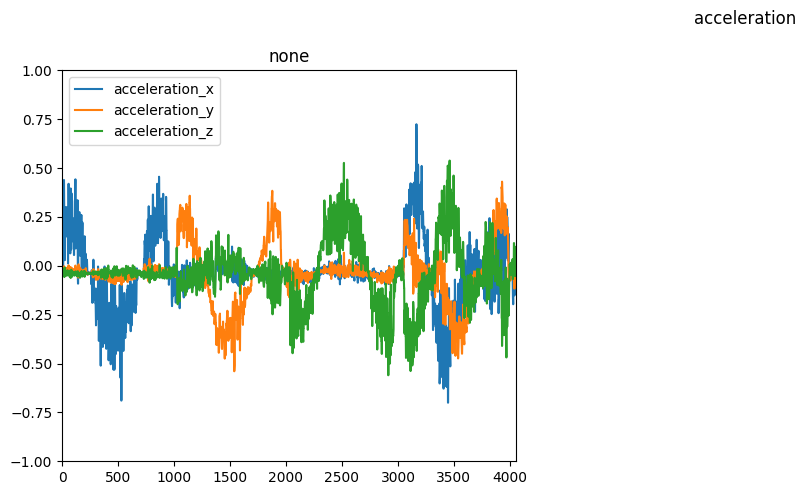

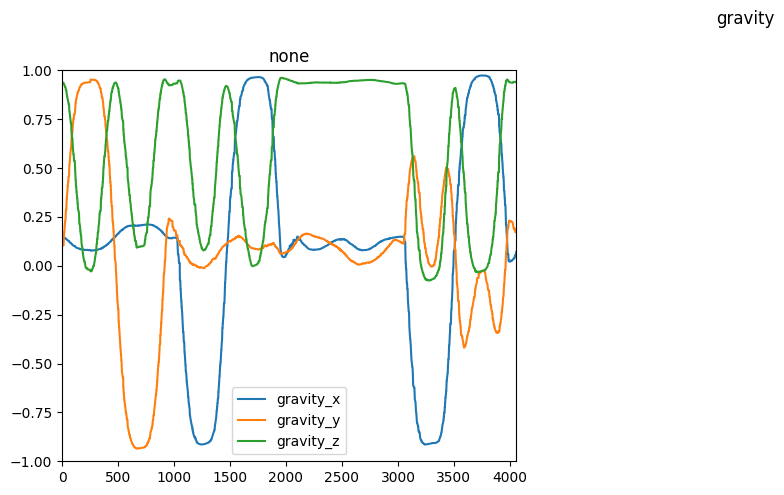

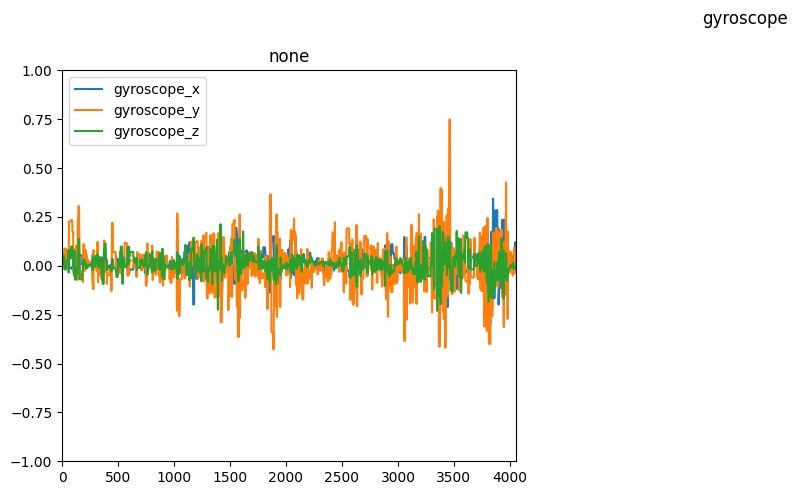

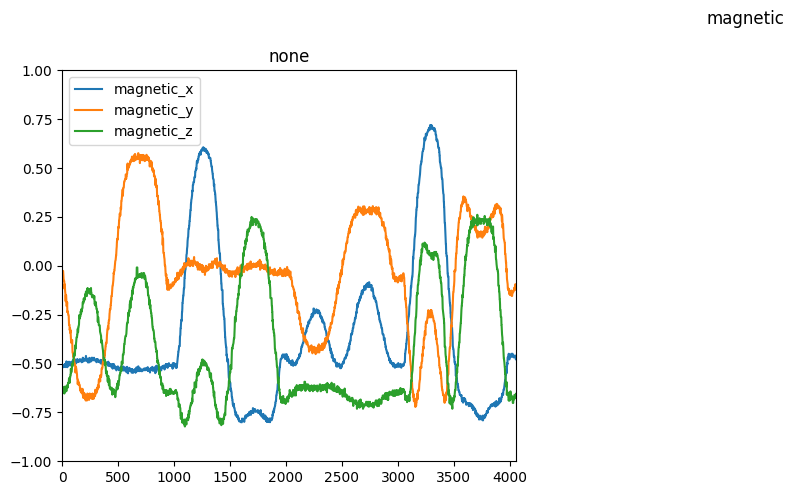

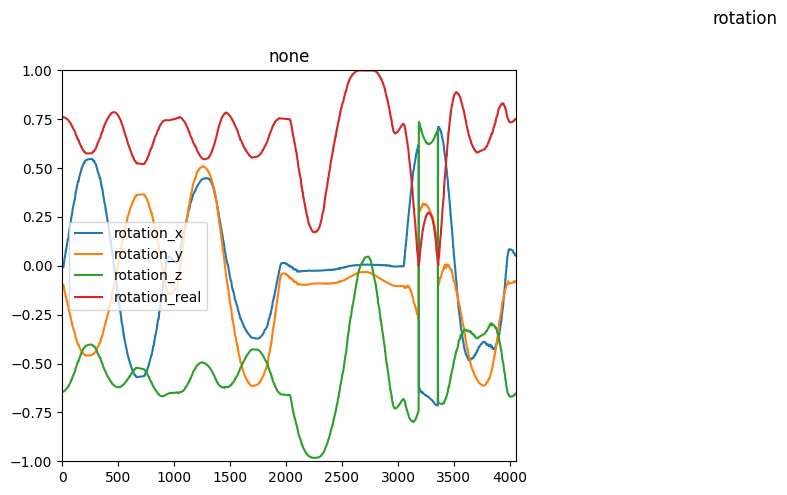

In [48]:
for sensor,axes in imu_sensor_axes:
    plot_imu(sensor, [f'{sensor}_{axis}' for axis in axes])

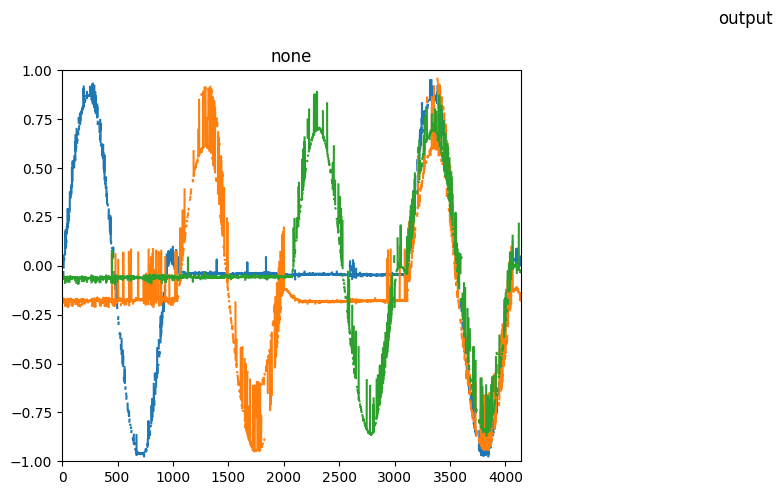

In [49]:
plot_motor('output', [f'output_{x}' for x in ['0', '1', '2']])